In [2]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, HuberRegressor

dftest = pd.read_csv("test.csv", engine='python')
print(dftest.head())

     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities      ...       ScreenPorch PoolArea PoolQC  Fence  \
0         Lvl    AllPub      ...               120        0    NaN  MnPrv   
1         Lvl    AllPub      ...                 0        0    NaN    NaN   
2         Lvl    AllPub      ...                 0        0    NaN  MnPrv   
3         Lvl    AllPub      ...                 0        0    NaN    NaN   
4         HLS    AllPub      ...               144        0    NaN    NaN   

  MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         NaN   

In [4]:
dftest.shape

(1459, 80)

In [5]:
dftest.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
654,2115,50,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,NaN,0,7,2008,WD,Normal
1225,2686,60,RL,75.0,12447,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2006,New,Partial
1149,2610,85,RL,50.0,6723,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdWo,NaN,0,9,2007,WD,Normal
524,1985,120,RL,NaN,3940,Pave,NaN,Reg,Lvl,AllPub,...,144,0,NaN,NaN,NaN,0,8,2008,WD,Normal
1301,2762,20,RL,77.0,9510,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
245,1706,20,RL,85.0,11128,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,NaN,0,10,2009,WD,Normal
1243,2704,20,RL,NaN,9240,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2006,WD,Normal
353,1814,30,RM,62.0,7404,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2009,Oth,Normal
501,1962,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1260,2721,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal


In [6]:
dftest.isna().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond

In [7]:
##Proportion of NaNs within columns
Isnull = dftest.isnull().sum()/len(dftest)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending = False)
Isnull

PoolQC          99.794380
MiscFeature     96.504455
Alley           92.666210
Fence           80.123372
FireplaceQu     50.034270
LotFrontage     15.558602
GarageYrBlt      5.346127
GarageCond       5.346127
GarageQual       5.346127
GarageFinish     5.346127
GarageType       5.209047
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtQual         3.015764
BsmtFinType1     2.878684
BsmtFinType2     2.878684
MasVnrType       1.096642
MasVnrArea       1.028101
MSZoning         0.274160
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
Utilities        0.137080
Functional       0.137080
Exterior2nd      0.068540
Exterior1st      0.068540
SaleType         0.068540
BsmtFinSF1       0.068540
BsmtFinSF2       0.068540
BsmtUnfSF        0.068540
KitchenQual      0.068540
GarageCars       0.068540
GarageArea       0.068540
TotalBsmtSF      0.068540
dtype: float64

In [9]:
# Utilities is useless
dftest = dftest.drop(['Utilities'], axis=1)

In [10]:
## Dropping 'PoolQC', 'Fence', 'MiscFeature' for having too many NaNs; originally had decided to impute PoolFC
dftest.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [11]:
## Dropping 'Alley' for same reason
dftest.drop(['Alley'],axis=1,inplace=True)

In [13]:
## Dropping 'GarageYrBlt' - highly colinear with 'YearBuilt'; also has many NaNs
dftest.drop(['GarageYrBlt'],axis=1,inplace=True)

In [23]:
## Imputing Basement NaNs 
dftest['BsmtCond']=dftest['BsmtCond'].fillna(dftest['BsmtCond'].mode()[0])
dftest['BsmtQual']=dftest['BsmtQual'].fillna(dftest['BsmtQual'].mode()[0])

In [24]:
##GarageType, GarageFinish, GarageQual and GarageCond these are replacing with None
# for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
#     dftrain[col] = dftrain[col].fillna('None')
## Revised approach: imputing garage variables
dftest['GarageFinish']=dftest['GarageFinish'].fillna(dftest['GarageFinish'].mode()[0])
dftest['GarageQual']=dftest['GarageQual'].fillna(dftest['GarageQual'].mode()[0])
dftest['GarageCond']=dftest['GarageCond'].fillna(dftest['GarageCond'].mode()[0])
dftest['GarageType']=dftest['GarageType'].fillna(dftest['GarageType'].mode()[0])

In [25]:
## 'FireplaceQu' comes in under the 50% NaN threshold for dropping a column; however, will keep this variable in mind when testing. Imputation could skew final result
dftest['FireplaceQu']=dftest['FireplaceQu'].fillna(dftest['FireplaceQu'].mode()[0])

In [27]:
## Imputing 'Electrical' with mode
dftest['Electrical'] = dftest['Electrical'].fillna(dftest['Electrical']).mode()[0]

In [28]:
##Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
dftest['LotFrontage'] = dftest.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [29]:
#GarageYrBlt, GarageArea and GarageCars these are replacing with zero
for col in ['GarageArea', 'GarageCars']:
    dftest[col] = dftest[col].fillna(int(0))

In [30]:
#BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual these are replacing with None
# for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
#     dftrain[col] = dftrain[col].fillna('None')
## Trying imputation: Filling with 'None' method doesn't work
dftest['BsmtExposure']=dftest['BsmtExposure'].fillna(dftest['BsmtExposure'].mode()[0])
dftest['BsmtFinType1']=dftest['BsmtFinType1'].fillna(dftest['BsmtFinType1'].mode()[0])
dftest['BsmtFinType2']=dftest['BsmtFinType2'].fillna(dftest['BsmtFinType2'].mode()[0])
dftest['BsmtQual']=dftest['BsmtQual'].fillna(dftest['BsmtQual'].mode()[0])
dftest['BsmtCond']=dftest['BsmtCond'].fillna(dftest['BsmtCond'].mode()[0])

In [31]:
# MasVnrType and MasVnrArea: replace with 0
dftest['MasVnrArea'] = dftest['MasVnrArea'].fillna(dftest['MasVnrArea'].mode()[0])
dftest['MasVnrType'] = dftest['MasVnrType'].fillna(dftest['MasVnrType'].mode()[0])

In [32]:
dftest.dropna(inplace=True)

In [33]:
##Proportion of NaNs within columns
Isnull = dftest.isnull().sum()/len(dftest)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending = False)
Isnull

Series([], dtype: float64)

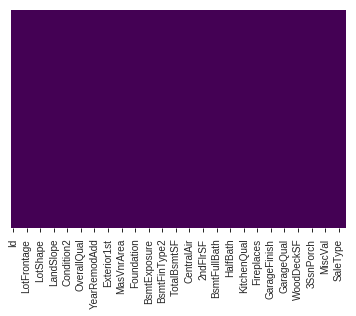

In [34]:
sns.heatmap(dftest.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [37]:
dftest.loc[:, dftest.isnull().any()].head()

""
0
1
2
3
4


In [ ]:
dftest['Utilities']=dftest['Utilities'].fillna(dftest['Utilities'].mode()[0])
dftest['Exterior1st']=dftest['Exterior1st'].fillna(dftest['Exterior1st'].mode()[0])
dftest['Exterior2nd']=test_df['Exterior2nd'].fillna(dftest['Exterior2nd'].mode()[0])
dftest['BsmtFinType1']=dftest['BsmtFinType1'].fillna(dftest['BsmtFinType1'].mode()[0])
dftest['BsmtFinSF1']=dftest['BsmtFinSF1'].fillna(dftest['BsmtFinSF1'].mean())
dftest['BsmtFinSF2']=dftest['BsmtFinSF2'].fillna(dftest['BsmtFinSF2'].mean())
dftest['BsmtUnfSF']=dftest['BsmtUnfSF'].fillna(dftest['BsmtUnfSF'].mean())
dftest['TotalBsmtSF']=dftest['TotalBsmtSF'].fillna(dftest['TotalBsmtSF'].mean())
dftest['BsmtFullBath']=dftest['BsmtFullBath'].fillna(dftest['BsmtFullBath'].mode()[0])
dftest['BsmtHalfBath']=dftest['BsmtHalfBath'].fillna(dftest['BsmtHalfBath'].mode()[0])
dftest['KitchenQual']=dftest['KitchenQual'].fillna(dftest['KitchenQual'].mode()[0])
dftest['Functional']=dftest['Functional'].fillna(dftest['Functional'].mode()[0])
dftest['GarageCars']=dftest['GarageCars'].fillna(dftest['GarageCars'].mean())
dftest['GarageArea']=dftest['GarageArea'].fillna(dftest['GarageArea'].mean())
dftest['SaleType']=dftest['SaleType'].fillna(dftest['SaleType'].mode()[0])

In [ ]:
df.to_csv(file_name, sep='\t')